Epoch 0, Error 0.26494218853803786
Epoch 1000, Error 0.2235840603392406
Epoch 2000, Error 0.17462757598469963
Epoch 3000, Error 0.10188457950167681
Epoch 4000, Error 0.027828299455861065
Epoch 5000, Error 0.012077362200690488
Epoch 6000, Error 0.0072141383758527675
Epoch 7000, Error 0.005021506846640204
Epoch 8000, Error 0.0038074418814376654
Epoch 9000, Error 0.00304662044747136
Pesos y sesgos finales:
[[-3.95617431 -5.82408642]
 [-3.94831779 -5.7788799 ]]
[5.82958073 2.20482094]
[[ 7.8648409 ]
 [-8.14507895]]
[-3.61204201]
Salidas obtenidas:
[[0.04284849]
 [0.95214125]
 [0.95225288]
 [0.06092651]]


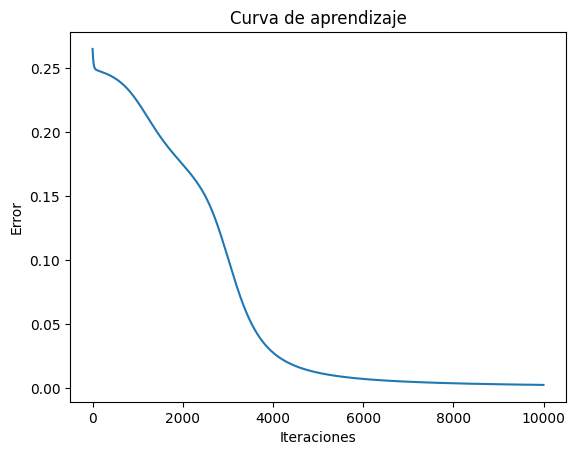

In [1]:
# Importar numpy para operaciones matriciales
import numpy as np
# Importar matplotlib.pyplot para graficar
import matplotlib.pyplot as plt

# Definir una función de activación sigmoide
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Definir la derivada de la función sigmoide
def sigmoid_der(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Definir los datos de entrada y salida
X = np.array([[0,0], [0,1], [1,0], [1,1]]) # Entradas binarias
y = np.array([[0], [1], [1], [0]]) # Salidas XOR

# Definir los parámetros de la red neuronal
n_input = 2 # Número de neuronas de entrada
n_hidden = 2 # Número de neuronas ocultas
n_output = 1 # Número de neuronas de salida
lr = 0.1 # Tasa de aprendizaje
epochs = 10000 # Número de iteraciones

# Inicializar los pesos y los sesgos de forma aleatoria
W1 = np.random.randn(n_input, n_hidden) # Pesos entre la capa de entrada y la capa oculta
b1 = np.random.randn(n_hidden) # Sesgos de la capa oculta
W2 = np.random.randn(n_hidden, n_output) # Pesos entre la capa oculta y la capa de salida
b2 = np.random.randn(n_output) # Sesgos de la capa de salida

# Crear una lista vacía para guardar los valores del error
error_list = []

# Bucle de entrenamiento
for epoch in range(epochs):
  # Propagación hacia adelante
  Z1 = X.dot(W1) + b1 # Suma ponderada de la capa oculta
  A1 = sigmoid(Z1) # Activación de la capa oculta
  Z2 = A1.dot(W2) + b2 # Suma ponderada de la capa de salida
  A2 = sigmoid(Z2) # Activación de la capa de salida

  # Cálculo del error cuadrático medio
  error = ((y - A2) ** 2).mean()
  # Agregar el valor del error a la lista
  error_list.append(error)

  # Propagación hacia atrás
  dA2 = -(y - A2) # Derivada del error con respecto a la activación de salida
  dZ2 = dA2 * sigmoid_der(Z2) # Derivada del error con respecto a la suma ponderada de salida
  dW2 = A1.T.dot(dZ2) # Derivada del error con respecto a los pesos de salida
  db2 = dZ2.sum(axis=0) # Derivada del error con respecto a los sesgos de salida
  dA1 = dZ2.dot(W2.T) # Derivada del error con respecto a la activación oculta
  dZ1 = dA1 * sigmoid_der(Z1) # Derivada del error con respecto a la suma ponderada oculta
  dW1 = X.T.dot(dZ1) # Derivada del error con respecto a los pesos ocultos
  db1 = dZ1.sum(axis=0) # Derivada del error con respecto a los sesgos ocultos

  # Actualización de los pesos y los sesgos con el descenso del gradiente
  W2 -= lr * dW2 
  b2 -= lr * db2 
  W1 -= lr * dW1 
  b1 -= lr * db1 

  # Imprimir el error cada 1000 iteraciones
  if epoch % 1000 == 0:
    print(f"Epoch {epoch}, Error {error}")

# Impresión de los resultados finales
print("Pesos y sesgos finales:")
print(W1)
print(b1)
print(W2)
print(b2)
print("Salidas obtenidas:")
print(A2)

# Graficación de la curva de aprendizaje
plt.plot(error_list)
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Curva de aprendizaje")
plt.show()
